# **Import libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

# **Data Preprocessing**

**LOAD DATASET**

In [2]:
df = pd.read_csv('/content/spam.csv')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df = df.rename(columns={"v1":"label", "v2":"text"})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


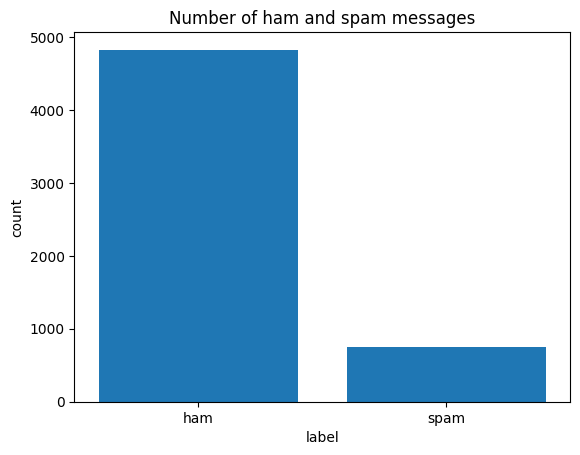

In [4]:
sns.barplot(x = df["label"].value_counts().index,
            y = df["label"].value_counts(),
            saturation = 1).set(title = "Number of ham and spam messages");

**Label Encoder**

In [5]:
X = df["text"]
Y = df["label"]
lb = LabelEncoder()
Y = lb.fit_transform(Y)
Y = Y.reshape(-1, 1)

**Divine dataset into train and test sets**

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

In [7]:
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)

X_train_seq = sequence.pad_sequences(X_train_seq, maxlen = max_len)

# **Model**

In [8]:
def rnn_model():
    model = Sequential()

    model.add(Embedding(max_words, 50, input_length=max_len))
    model.add(LSTM(64))

    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))

    # model.add(Dropout(0.5))
    # model.add(BatchNormalization())
    # model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [9]:
rnn = rnn_model()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 910, 50)           678350    
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 256)               16640     
                                                        

**Model Trainning**

In [10]:
rnn.compile(loss='binary_crossentropy',optimizer=Adam(0.001),metrics=['accuracy'])



In [11]:
verbose = 1
epochs = 10
batch_size = 128
validation_split = 0.2

history = rnn.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    validation_split=validation_split
    )

Epoch 1/10
28/28 [==============================] - 47s 2s/step - loss: 0.3827 - accuracy: 0.8597 - val_loss: 0.4624 - val_accuracy: 0.8722
Epoch 2/10
28/28 [==============================] - 43s 2s/step - loss: 0.1228 - accuracy: 0.9663 - val_loss: 0.3331 - val_accuracy: 0.9025
Epoch 3/10
28/28 [==============================] - 45s 2s/step - loss: 0.0408 - accuracy: 0.9910 - val_loss: 0.2617 - val_accuracy: 0.9451
Epoch 4/10
28/28 [==============================] - 45s 2s/step - loss: 0.0224 - accuracy: 0.9955 - val_loss: 0.1992 - val_accuracy: 0.9540
Epoch 5/10
28/28 [==============================] - 44s 2s/step - loss: 0.0126 - accuracy: 0.9986 - val_loss: 0.1550 - val_accuracy: 0.9608
Epoch 6/10
28/28 [==============================] - 45s 2s/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.1423 - val_accuracy: 0.9765
Epoch 7/10
28/28 [==============================] - 44s 2s/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.1208 - val_accuracy: 0.9821
Epoch 8/10
28/28 [==

**Visualization**

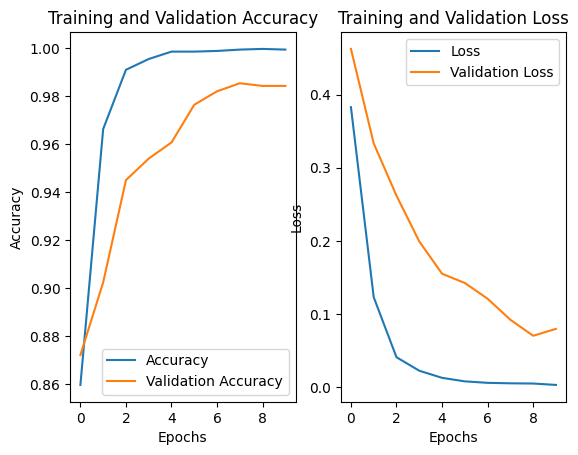

In [12]:
# Plotting the accuracy and loss over time

# Training history
history_dict = history.history

# Seperating validation and training accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Seperating validation and training loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plotting
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

In [13]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy = rnn.evaluate(test_X_seq, Y_test)

35/35 [==============================] - 4s 126ms/step - loss: 0.0608 - accuracy: 0.9928


In [14]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy[1]*100, accuracy[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 99.28%
Loss: 0.061



In [27]:
ypreds = np.argmax((rnn.predict(test_X_seq, verbose=1)), axis=1)

35/35 [==============================] - 8s 218ms/step


In [28]:
print(classification_report(Y_test, ypreds1, target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.86      1.00      0.93       960
        Spam       0.00      0.00      0.00       155

    accuracy                           0.86      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.74      0.86      0.80      1115



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


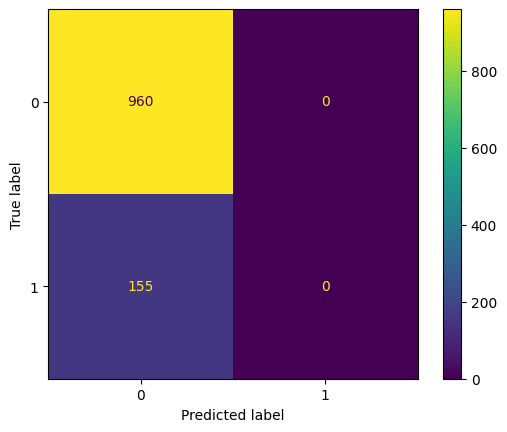

In [31]:
cm = confusion_matrix(Y_test, ypreds)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()